In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Loading data

In [5]:
daily_activity = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_calories = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
daily_steps = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
hourly_calories = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
minute_calories_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')
minute_calories_wide = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv')
minute_intensities_wide = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv')
minuteMETs_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')
minute_sleep = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
minute_steps_narrow = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')
sleep_day = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log_info = pd.read_csv('D:/data/archive/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

# Self-defined functions

In [17]:
def plot_heatmap(corrmat, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title,fontsize=25)
    plt.yticks(rotation=0)
    plt.show()

In [6]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [20]:
daily_activity.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5


# The trend of daily activity distance over the week

Text(0, 0.5, 'Active Minutes')

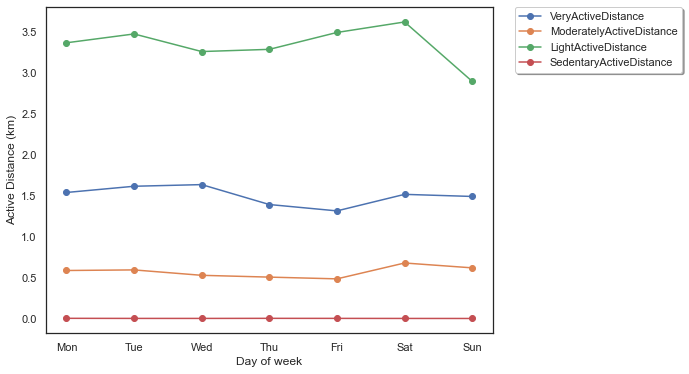

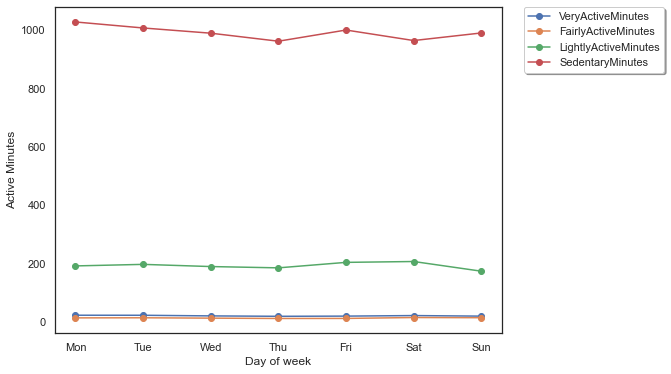

In [23]:
daily_activity.rename(columns={'ActivityDate': 'ActivityDay'},inplace=True)
daily_activity['DayOfWeek'] = pd.to_datetime(daily_activity['ActivityDay']).dt.dayofweek
daily_activity_dayofweek = daily_activity.drop('Id',axis=1).groupby('DayOfWeek').mean()
features_distance_interested = ['VeryActiveDistance',
                       'ModeratelyActiveDistance','LightActiveDistance',
                      'SedentaryActiveDistance']
features_minutes_interested = ['VeryActiveMinutes','FairlyActiveMinutes',
                      'LightlyActiveMinutes','SedentaryMinutes']
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
daily_activity_dayofweek['DayOfWeek'] = daily_activity_dayofweek.index
daily_activity_dayofweek['DayOfWeek'] = daily_activity_dayofweek['DayOfWeek'].apply(lambda x: days[x])
plt.figure(figsize=(8,6))
for feature in features_distance_interested:
    plt.plot(daily_activity_dayofweek['DayOfWeek'],daily_activity_dayofweek[feature],'-o')
plt.xlabel('Day of week')
plt.ylabel('Active Distance (km)')
plt.legend(labels=features_distance_interested,shadow=True,bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0)   
plt.figure(figsize=(8,6))
for feature in features_minutes_interested:
    plt.plot(daily_activity_dayofweek['DayOfWeek'],daily_activity_dayofweek[feature],'-o')
plt.legend(labels=features_minutes_interested,shadow=True,bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0)
plt.xlabel('Day of week')
plt.ylabel('Active Minutes')

Light active distance is the major part of all active distances. People tend to be more active on Saturdays as the rise from Friday to Saturday can be seen from all the three active cases (LightActiveDistance,VeryActiveDistance,ModeratelyActiveDistance). In terms of time as unit of minutes, people spend most time on sedentary activities everyday for the whole week. The time people spend on different activities stays steady over the week.

#  Components of activity distance

[None, None, None]

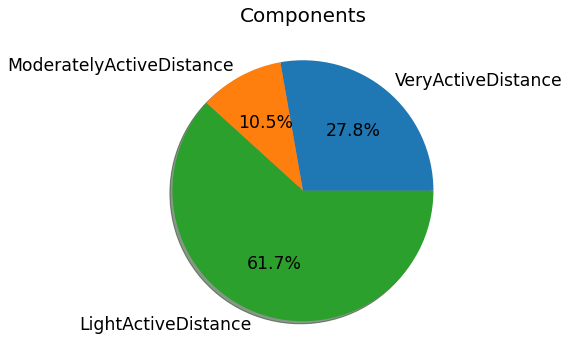

In [8]:
plt.figure(figsize=(8,6))
component_activity = [daily_activity['VeryActiveDistance'].mean(),daily_activity['ModeratelyActiveDistance'].mean(),
              daily_activity['LightActiveDistance'].mean()]
labels = ['VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance']
patches,texts,autotexts = plt.pie(component_activity,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Components of active distance",fontsize=20)
[x.set_fontsize('xx-large') for x in autotexts]
[x.set_fontsize('xx-large') for x in texts]
#pd.Series(autotexts).apply(lambda x:x.set_fontsize('xx-large'))

As an auxillary analysis of activie distance, the pie chart shows the proportion each active distance occupies. 
Light active distance occupies more than a half. It is the major daily activity people engage in.

# Correlation analysis

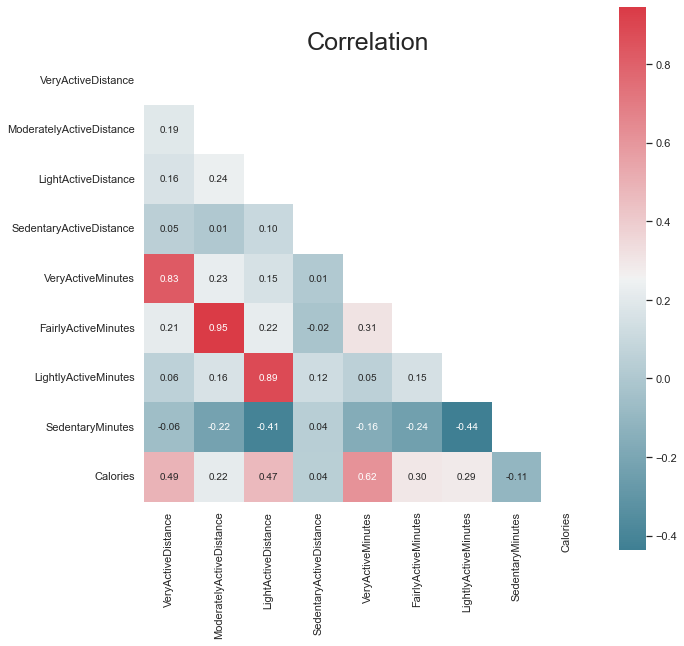

In [24]:
features_selected = [
                     'VeryActiveDistance','ModeratelyActiveDistance',
                     'LightActiveDistance','SedentaryActiveDistance',
                    'VeryActiveMinutes','FairlyActiveMinutes',
                    'LightlyActiveMinutes','SedentaryMinutes','Calories']
plot_heatmap(daily_activity[features_selected].corr(),'Correlation')

The calories burnt everyday is highly related to very active minutes

In [8]:
df_dailyCalories.columns

Index(['Id', 'ActivityDay', 'Calories'], dtype='object')

In [9]:
df_dailyIntensities.columns

Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')

In [11]:
df_dailySteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [32]:
cols_to_use = df_dailyActivity.columns.difference(df_dailyCalories.columns)

In [5]:
df_daily = df_dailyActivity.merge(df_dailyCalories,on=['Id','ActivityDay'])

In [36]:
df_daily.columns

Index(['Id', 'ActivityDay', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories_x', 'Calories_y'],
      dtype='object')

In [6]:
df_daily['ActivityDay'] = pd.to_datetime(df_daily['ActivityDay'])
df_daily['ActivityDay']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDay, Length: 940, dtype: datetime64[ns]

In [13]:
df_hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [14]:
df_hourlyIntensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [21]:
df_minuteCaloriesNarrow

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,1.33353
1325576,8877689391,5/12/2016 1:56:00 PM,1.33353
1325577,8877689391,5/12/2016 1:57:00 PM,1.33353
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353


In [18]:
df_minuteCaloriesWide

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,...,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170
21641,8877689391,5/13/2016 4:00:00 AM,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,...,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170
21642,8877689391,5/13/2016 5:00:00 AM,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,...,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170
21643,8877689391,5/13/2016 6:00:00 AM,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,1.2170,...,4.6246,4.6246,4.8680,4.3812,4.3812,1.5821,1.5821,3.8944,4.6246,3.8944


In [22]:
df_minuteIntensitiesWide

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1


In [24]:
df_minuteStepsNarrow

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,0
1325576,8877689391,5/12/2016 1:56:00 PM,0
1325577,8877689391,5/12/2016 1:57:00 PM,0
1325578,8877689391,5/12/2016 1:58:00 PM,0


In [25]:
df_weightLogInfo

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
